# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    U_train, S_train, VT_train = calc_svd(X_train)
    V_train = VT_train.T
    X_train_reduced = X_train @ V_train[:, :n_components]
    X_test_reduced = X_test @ V_train[:, :n_components]
    return X_train_reduced, X_test_reduced, V_train


In [3]:
def calc_svd(X):
    X_centered = X - np.mean(X, axis=0)
    X_cov = np.dot(X_centered.T, X_centered)
    eigenvalues, eigenvectors = np.linalg.eigh(X_cov)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvalues = np.clip(eigenvalues, a_min=0, a_max=None)
    S = np.sqrt(eigenvalues)
    eps = 1e-10
    S_safe = S + eps
    U = np.dot(X_centered, eigenvectors) / S_safe
    VT = eigenvectors.T

    return U, S, VT


## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


In [5]:
svd_components = [2, 4, 8, 16, 32, 64, 128, 256]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")

    X_train_svd, X_test_svd, V_train = apply_svd_custom(X_train, X_test, n_components)

    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

Training models with different levels of SVD preprocessing...

Applying custom SVD with 2 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 2, Accuracy: 0.4484, Training time: 0.4330 seconds

Applying custom SVD with 4 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 4, Accuracy: 0.5765, Training time: 0.5051 seconds

Applying custom SVD with 8 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 8, Accuracy: 0.7870, Training time: 0.6371 seconds

Applying custom SVD with 16 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 16, Accuracy: 0.8563, Training time: 1.0514 seconds

Applying custom SVD with 32 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 32, Accuracy: 0.8972, Training time: 3.6400 seconds

Applying custom SVD with 64 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 64, Accuracy: 0.9138, Training time: 15.2198 seconds

Applying custom SVD with 128 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 128, Accuracy: 0.9199, Training time: 57.0443 seconds

Applying custom SVD with 256 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 256, Accuracy: 0.9211, Training time: 161.1806 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


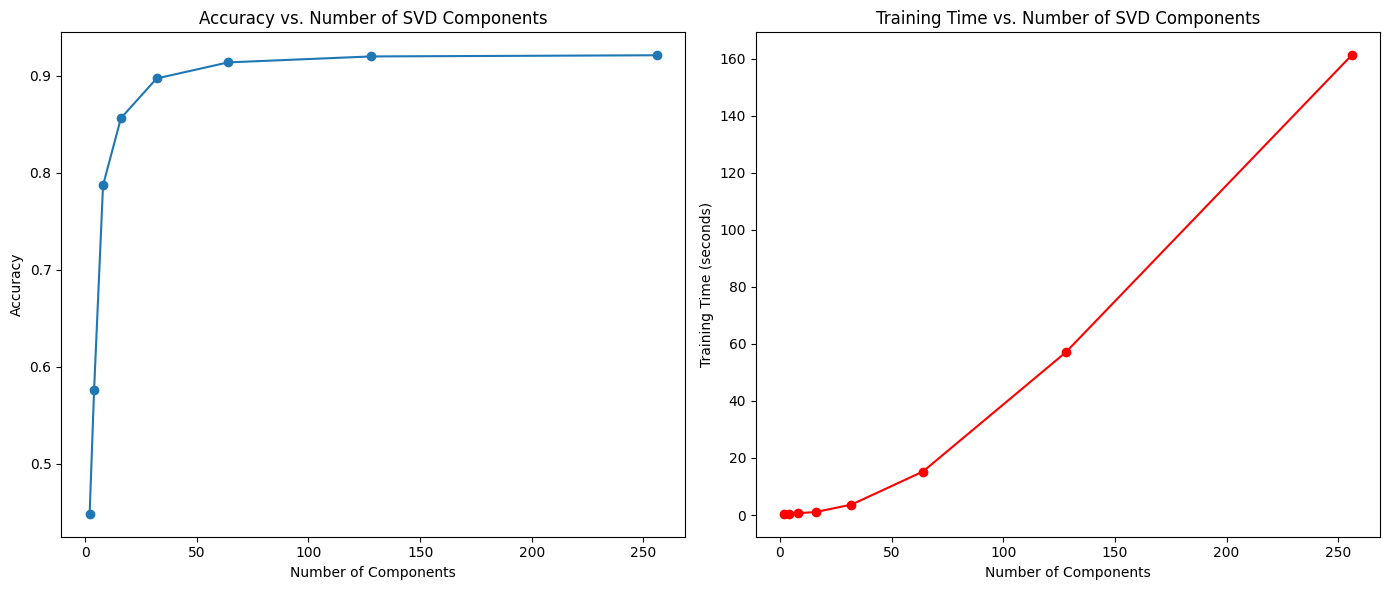

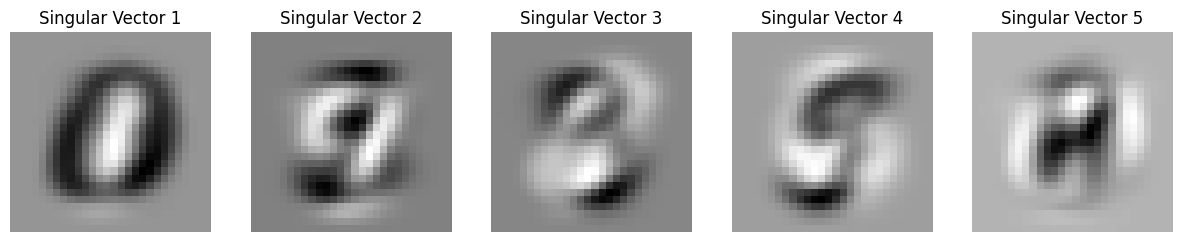

In [6]:
import matplotlib.pyplot as plt

n_components_list = [r['n_components'] for r in results]
accuracy_list = [r['accuracy'] for r in results]
training_time_list = [r['training_time'] for r in results]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_time_list, marker='o', color='red')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()


# Get the top 5 singular vectors from the last iteration (highest n_components)
top_singular_vectors = V_train[:, :5]

plt.figure(figsize=(15, 3))
for i in range(5):
    singular_vector_image = top_singular_vectors[:, i].reshape(28, 28)
    plt.subplot(1, 5, i+1)
    plt.imshow(singular_vector_image, cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

# Accuracy vs. number of components:

Trend: The accuracy rapidly increases as the number of SVD components grows, reaching a plateau around 100 components. After 100 components, the accuracy doesn't significantly improve, indicating diminishing returns.

Conclusion: for the MNIST dataset, and logistic regression, the number of components beyond 100 does not meaningfully improve accuracy but adds computational complexity. This is because adding the extra components may be useless / redundant increasing computational complexity.

# Training time vs. number of components:

Trend: From the right graph we can clearly see
that as the number of components increases, the total computational time increases.

Conclusion: increasing the number of components increases total time to build the model -- this is expected since more components result in higher-dimensional feature spaces, which take longer to process.


# Singular Vector Visualizations (Bottom):

Trend: The top 5 singular vectors look like rough approximations of digits (0, 1, 2, etc.), highlighting the patterns in the data that SVD captures.

Conclusion: These vectors show the directions of maximum variance in the dataset. They capture the most prominent features, which align with the general shapes of digits in the MNIST dataset.